<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [2145]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2146]:
#Importation de la librairie plotly express
import plotly.express as px

In [2147]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [2148]:
#Importation du fichier web.xlsx
df_web = pd.read_excel(r'C:\Users\maxim\Desktop\Nouveau dossier\web.xlsx')
#Importation du fichier erp.xlsx
df_erp = pd.read_excel(r'C:\Users\maxim\Desktop\Nouveau dossier\erp.xlsx')
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel(r'C:\Users\maxim\Desktop\Nouveau dossier\liaison.xlsx')

c:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [2149]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [2150]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [2151]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [2152]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
nb_doublons = df_erp['product_id'].duplicated().sum()
print("Il y a {} doublon dans la colonne product_id.".format(nb_doublons))

Il y a 0 doublon dans la colonne product_id.


In [2153]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp['stock_status'].value_counts()

# Remarque: la colonne stock_status devrait correspondre à la colonne stock_quantity pour les quantité égale à 0 (stock_quantity = 0 quand stock_status = outofstock)

stock_status
instock       733
outofstock     92
Name: count, dtype: int64

In [2154]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity']>0, 'instock', 'outofstock')
df_erp['stock_status_2'].value_counts()

stock_status_2
instock       733
outofstock     92
Name: count, dtype: int64

In [2155]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [2156]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
correspondance = df_erp["stock_status"] == df_erp["stock_status_2"]
matches = correspondance.sum()
print(f"Nombre de correspondances entre 'stock_status' et 'stock_status_2' : {matches}")

Nombre de correspondances entre 'stock_status' et 'stock_status_2' : 823


In [2157]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [2158]:
#Corriger la ou les données incohérentes

df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status"] = df_erp["stock_status_2"]

#Verification en utilisant le même code que plus haut pour afficher les problemes

df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [2159]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

conditions_price = df_erp['price'].isna() | (df_erp['price'] < 0) | (df_erp['price'] == 0)
print("La variable prix présente {} valeurs incorrectes.".format(conditions_price.sum()))

#Afficher le ou les prix non renseignés dans la colonne "price"

print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isna().sum()))

#Afficher le prix minimum de la colonne "price"

print("Prix minimum renseigné: {}".format(df_erp['price'].min()))

#Afficher le prix maximum de la colonne "price"

print("Prix maximum renseigné: {}".format(df_erp['price'].max()))

#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)

print(df_erp[df_erp['price']<0])

# Ces tarifs négatifs sont à  ne pas prendre en compte pour notre analyse, remonter l'information au service concerné pour déterminer d'où provient l'erreur pour éviter de 
# les retrouver dans les prochaines analyses.

# Suppression des lignes incriminées
df_erp = df_erp[df_erp['price'] >= 0]

# Vérification du résultat
print(df_erp[df_erp['price']<0])

La variable prix présente 3 valeurs incorrectes.
Nombres d'article avec un prix non renseignés: 0
Prix minimum renseigné: -20.0
Prix maximum renseigné: 225.0
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [2160]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
conditions_stock = df_erp['stock_quantity'].isna() | (df_erp['stock_quantity'] < 0)
print("La variable stock présente {} valeurs incorrectes.".format(conditions_stock.sum()))

#Afficher la quantité minimum de la colonne "stock_quantity"

print("Stock minimum renseigné: {}".format(df_erp['stock_quantity'].min()))

#Afficher la quantité maximum de la colonne "stock_quantity"

print("Stock maximum renseigné: {}".format(df_erp['stock_quantity'].max()))

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)

print(df_erp[df_erp['stock_quantity']<0])
#Remplacer les quantités par 0 ?

df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

# Vérification:
print(df_erp[df_erp['stock_quantity']<0])

La variable stock présente 2 valeurs incorrectes.
Stock minimum renseigné: -10
Stock maximum renseigné: 145
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [2161]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?

df_erp['onsale_web'].unique()

#La colonne onsale_web correspond aux produits en vente sur le site.

array([1, 0], dtype=int64)

In [2162]:
#Quelles sont les colonnes à conserver selon vous?

# Les colonnes à conserver seraient product_id, price, stock_quantity et purchase_price.

In [2163]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])


In [2164]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [2165]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

print("Prix d'achat non renseignés: {}".format(df_erp['purchase_price'].isna().sum()))

#Afficher le prix minimum de la colonne "purchase_price"

print("Prix d'achat minimum renseigné: {}€".format(df_erp['purchase_price'].min()))

#Afficher le prix maximum de la colonne "purchase_price"

print("Prix d'achat maximum renseigné: {}€".format(df_erp['purchase_price'].max()))

Prix d'achat non renseignés: 0
Prix d'achat minimum renseigné: 2.74€
Prix d'achat maximum renseigné: 137.81€


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [2166]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

#Nombre de caractéristiques
print(df_web.info())

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null

In [2167]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
print(df_web.head())

Le tableau comporte 29 colonne(s)
     sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0  11862        0             0             0             0.0          3.0   
1  16057        0             0             0             0.0          5.0   
2  14692        0             0             0             0.0          5.0   
3  16295        0             0             0             0.0         14.0   
4  15328        0             0             0             0.0          2.0   

  tax_status  tax_class  post_author           post_date  ...  \
0        NaN        NaN          2.0 2018-02-12 13:46:23  ...   
1        NaN        NaN          2.0 2018-04-17 15:29:17  ...   
2    taxable        NaN          2.0 2019-03-19 10:06:47  ...   
3        NaN        NaN          2.0 2018-02-15 14:05:06  ...   
4    taxable        NaN          2.0 2019-03-27 18:05:09  ...   

                                           post_name       post_modified  \
0                        gille

In [2168]:
#Selon vous, quelles sont les colonnes à conserver ?
# SKU, total_sales, post_date, post_title, post_mime_type, product_type

In [2169]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web_clean = df_web[["sku","total_sales","post_title", "product_type", "post_mime_type", "post_date"]]

In [2170]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web_clean['sku'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1513 entries, 0 to 1512
Series name: sku
Non-Null Count  Dtype 
--------------  ----- 
1428 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB


In [2171]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
invalid_sku = df_web[df_web['sku'].str.contains(r'\D', na=False)]

print(invalid_sku)

                      sku  virtual  downloadable  rating_count  \
272               13127-1        0             0             0   
842   bon-cadeau-25-euros        0             0             0   
1117              13127-1        0             0             0   
1387  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  tax_class  post_author  \
272              0.0          4.0    taxable        NaN          2.0   
842              0.0          7.0        NaN        NaN          1.0   
1117             0.0          4.0        NaN        NaN          2.0   
1387             0.0          7.0    taxable        NaN          1.0   

               post_date  ...                                       post_name  \
272  2020-06-09 15:42:04  ...  clos-du-mont-olivet-chateauneuf-du-pape-2007-2   
842  2018-06-01 13:53:46  ...                          bon-cadeau-de-25-euros   
1117 2020-06-09 15:42:04  ...  clos-du-mont-olivet-chateauneuf-du

In [2172]:
#Identifier les lignes sans code articles
df_web_clean['sku'].isna().sum()

85

In [2173]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
print(df_web_clean.loc[df_web_clean['sku'].isna()])

# Suppression des lignes au sku NaN
df_web_clean = df_web_clean.loc[~df_web_clean["sku"].isna()]

      sku  total_sales post_title product_type post_mime_type post_date
8     NaN          NaN        NaN          NaN            NaN       NaT
20    NaN          NaN        NaN          NaN            NaN       NaT
30    NaN          NaN        NaN          NaN            NaN       NaT
37    NaN          NaN        NaN          NaN            NaN       NaT
41    NaN          NaN        NaN          NaN            NaN       NaT
...   ...          ...        ...          ...            ...       ...
1384  NaN          NaN        NaN          NaN            NaN       NaT
1429  NaN          NaN        NaN          NaN            NaN       NaT
1432  NaN          NaN        NaN          NaN            NaN       NaT
1445  NaN          NaN        NaN          NaN            NaN       NaT
1457  NaN          NaN        NaN          NaN            NaN       NaT

[85 rows x 6 columns]


In [2174]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web_clean['sku'].duplicated().sum()

714

In [2175]:
# PERSO
df_web_clean.isna().sum()

sku                 0
total_sales         0
post_title          0
product_type        1
post_mime_type    714
post_date           0
dtype: int64

In [2176]:
# Il y a autant de doublons de SKU que de post_mime_type non renseignés. Exploration du df via l'extension data wrangler, pour l'exemple nous allons selectionner 2 lignes au SKU unique
df_web_clean.loc[df_web_clean['sku']== 16515]

,sku,total_sales,post_title,product_type,post_mime_type,post_date
6,16515,10.0,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin,NaN,2018-06-02 09:31:31
866,16515,10.0,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin,image/jpeg,2018-06-02 09:31:31


In [2177]:
# Les valeurs SKU sont donc en double lorsque leur type de fichier n'est pas renseigné, on supprime donc les lignes ayant le post_mime_type non renseigné
df_web_clean = df_web_clean.loc[~df_web_clean["post_mime_type"].isna()]

# Vérification du résultat
print("Le fichier web présente maintenant {} doublon.".format(df_web_clean.duplicated().sum()))


df_web_clean.isna().sum()


Le fichier web présente maintenant 0 doublon.


sku               0
total_sales       0
post_title        0
product_type      0
post_mime_type    0
post_date         0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [2178]:
#Dimension du dataset
#Nombre d'observations

print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))


#Nombre de caractéristiques
print(df_liaison.info())

Le tableau comporte 825 observation(s) ou article(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None


In [2179]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))


Le tableau comporte 2 colonne(s)


In [2180]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].is_unique

True

In [2181]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
print(df_liaison['id_web'].is_unique)
print("La colonne id_web présente {} doublons.".format(df_liaison['id_web'].duplicated().sum()))

False
La colonne id_web présente 90 doublons.


In [2182]:
#Avons-nous des articles sans correspondances?
print(df_liaison.isna().sum())

# Supression des lignes où id_web = NaN
df_liaison = df_liaison.loc[~df_liaison["id_web"].isna()]

#Contrôle des données
print(df_liaison.info())
print(df_liaison['id_web'].is_unique)
print(df_liaison.isna().sum())

id_web        91
product_id     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  734 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.2+ KB
None
True
id_web        0
product_id    0
dtype: int64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [2183]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, how="outer", on="product_id", indicator =True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      822 non-null    int64   
 1   onsale_web      822 non-null    int64   
 2   price           822 non-null    float64 
 3   stock_quantity  822 non-null    int64   
 4   stock_status    822 non-null    object  
 5   purchase_price  822 non-null    float64 
 6   id_web          734 non-null    object  
 7   _merge          822 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 46.0+ KB


In [2184]:
df_merge[df_merge['_merge'] != "both"] 

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
19,4055,0,86.1,0,outofstock,37.88,NaN,left_only
49,4090,0,73.0,0,outofstock,33.79,NaN,left_only
50,4092,0,47.0,0,outofstock,25.25,NaN,left_only
119,4195,0,14.1,0,outofstock,7.36,NaN,left_only
131,4209,0,73.5,0,outofstock,33.01,NaN,left_only
...,...,...,...,...,...,...,...,...
814,7196,0,31.0,55,instock,31.20,NaN,left_only
815,7200,0,31.0,6,instock,15.54,NaN,left_only
816,7201,0,31.0,18,instock,16.02,NaN,left_only
817,7203,0,45.0,30,instock,23.48,NaN,left_only


In [2185]:
df_merge[df_merge['_merge'] == "left_only"] 

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
19,4055,0,86.1,0,outofstock,37.88,NaN,left_only
49,4090,0,73.0,0,outofstock,33.79,NaN,left_only
50,4092,0,47.0,0,outofstock,25.25,NaN,left_only
119,4195,0,14.1,0,outofstock,7.36,NaN,left_only
131,4209,0,73.5,0,outofstock,33.01,NaN,left_only
...,...,...,...,...,...,...,...,...
814,7196,0,31.0,55,instock,31.20,NaN,left_only
815,7200,0,31.0,6,instock,15.54,NaN,left_only
816,7201,0,31.0,18,instock,16.02,NaN,left_only
817,7203,0,45.0,30,instock,23.48,NaN,left_only


In [2186]:
df_merge = df_merge.drop('_merge', axis=1)

In [2187]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge.isna().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
purchase_price     0
id_web            88
dtype: int64

In [2188]:
#Suppression des valeurs manquantes 
df_merge = df_merge.loc[~df_merge["id_web"].isna()] 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [2189]:
#Fusionnez les datasets df_merge et df_web
df_merge = df_merge.rename(columns={"id_web" : "sku"})
df_merge = pd.merge(df_merge, df_web_clean, how= "outer", on="sku", indicator=True)

In [2190]:
#Avons-nous des lignes sans correspondances?
df_merge.isna().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
purchase_price     0
sku                0
total_sales       20
post_title        20
product_type      20
post_mime_type    20
post_date         20
_merge             0
dtype: int64

In [2191]:
df_merge[df_merge['_merge'] != "both"] 

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_title,product_type,post_mime_type,post_date,_merge
81,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaN,NaN,NaT,left_only
127,5957,0,39.0,0,outofstock,20.75,13577,NaN,NaN,NaN,NaN,NaT,left_only
139,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaN,NaN,NaT,left_only
180,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaN,NaN,NaT,left_only
185,5955,0,27.3,0,outofstock,13.68,14377,NaN,NaN,NaN,NaN,NaT,left_only
186,5953,0,47.5,0,outofstock,23.81,14379,NaN,NaN,NaN,NaN,NaT,left_only
212,5505,0,10.1,0,outofstock,5.22,14648,NaN,NaN,NaN,NaN,NaT,left_only
218,5800,0,32.3,0,outofstock,16.02,14689,NaN,NaN,NaN,NaN,NaT,left_only
224,5559,0,27.9,3,instock,13.98,14715,NaN,NaN,NaN,NaN,NaT,left_only
227,5570,0,22.5,0,outofstock,11.16,14730,NaN,NaN,NaN,NaN,NaT,left_only


In [2192]:
df_merge[df_merge['_merge'] == "left_only"] 

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_title,product_type,post_mime_type,post_date,_merge
81,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaN,NaN,NaT,left_only
127,5957,0,39.0,0,outofstock,20.75,13577,NaN,NaN,NaN,NaN,NaT,left_only
139,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaN,NaN,NaT,left_only
180,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaN,NaN,NaT,left_only
185,5955,0,27.3,0,outofstock,13.68,14377,NaN,NaN,NaN,NaN,NaT,left_only
186,5953,0,47.5,0,outofstock,23.81,14379,NaN,NaN,NaN,NaN,NaT,left_only
212,5505,0,10.1,0,outofstock,5.22,14648,NaN,NaN,NaN,NaN,NaT,left_only
218,5800,0,32.3,0,outofstock,16.02,14689,NaN,NaN,NaN,NaN,NaT,left_only
224,5559,0,27.9,3,instock,13.98,14715,NaN,NaN,NaN,NaN,NaT,left_only
227,5570,0,22.5,0,outofstock,11.16,14730,NaN,NaN,NaN,NaN,NaT,left_only


In [2193]:
print(df_merge['product_id'].is_unique) 
#Suppression des valeurs manquantes
df_merge = df_merge.loc[~df_merge["total_sales"].isna()]

True


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

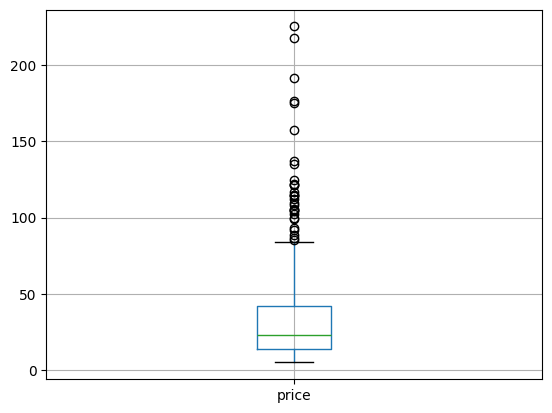

In [2194]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column="price")
plt.show()

In [2195]:
#Autre méthode avec plotly express
fig = px.box(df_merge, x='price')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [2196]:
#Calculer la moyenne du prix


#Calculer l'écart-type du prix
# Utilisation de la fonction describe qui nous retourne les valeurs statistiques du prix: 
print(df_merge['price'].describe())

#Calculer le Z-score
df_merge['z_score'] = (df_merge['price'] - df_merge['price'].mean()) / df_merge['price'].std()
df_merge

count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_title,product_type,post_mime_type,post_date,_merge,z_score
0,4729,1,8.6,26,instock,4.22,38,10.0,Emile Boeckel Crémant Brut Blanc de Blancs,Vin,image/jpeg,2018-04-18 12:25:58,both,-0.860030
1,4634,1,41.0,11,instock,20.12,41,6.0,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Vin,image/jpeg,2018-04-14 12:01:43,both,0.314039
2,4141,1,39.0,123,instock,24.86,304,8.0,Champagne Gosset Grande Réserve,Champagne,image/jpeg,2018-02-13 12:57:44,both,0.241565
3,5932,1,59.9,13,instock,27.18,523,0.0,Cognac Normandin Mercier VFC,Cognac,image/jpeg,2019-04-06 15:25:58,both,0.998912
4,5047,1,22.5,76,instock,13.78,531,8.0,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Champagne,image/jpeg,2018-07-18 15:58:02,both,-0.356340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,5561,1,58.0,8,instock,30.27,19820,6.0,Tempier Bandol Migoua 2017,Vin,image/jpeg,2018-11-26 10:54:29,both,0.930063
729,5563,1,58.0,16,instock,29.07,19821,8.0,Tempier Bandol Tourtine 2017,Vin,image/jpeg,2018-11-26 10:56:30,both,0.930063
730,5565,1,92.0,0,outofstock,46.11,19822,1.0,Tempier Bandol Cabassaou 2017,Vin,image/jpeg,2018-11-26 10:59:10,both,2.162110
731,7247,1,54.8,6,instock,27.18,13127-1,4.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Vin,image/jpeg,2020-06-09 15:42:04,both,0.814105


In [2197]:
#Quel est le seuil prix dont z-score est supérieur à 3?
zscore_outliers = df_merge.loc[(df_merge['z_score'] < -3) | (df_merge['z_score'] > 3)]
seuil_zscore = zscore_outliers['price'].min()
zscore_nb = zscore_outliers.shape[0]
print("Le seuil de prix avec la méthode du z score est de", seuil_zscore,"€, ce qui exlue", zscore_nb, "articles.")

Le seuil de prix avec la méthode du z score est de 116.4 €, ce qui exlue 13 articles.


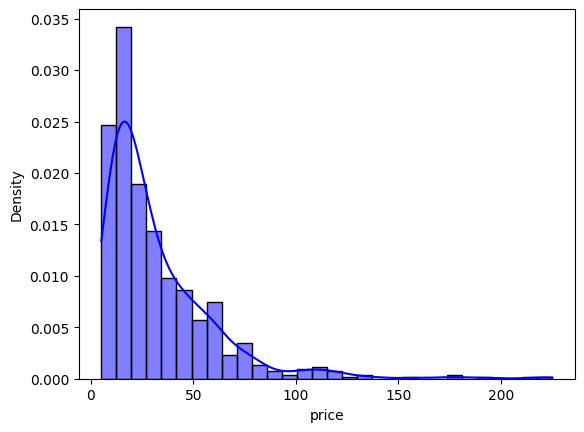

In [2198]:
# Visualisation de la distribution des prix
sns.histplot(df_merge['price'], kde=True, stat="density", color='blue', bins=30)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [2199]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
print(df_merge['price'].describe())

count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


In [2200]:
#Définissez un seuil pour les articles "outliers" en prix

q1=df_merge["price"].quantile(q=0.25)
q3=df_merge["price"].quantile(q=0.75)

IQR =q3-q1

bottom = q1 - 1.5*IQR
top = q3 + 1.5*IQR

#La valeur seuil inférieure  étant négative, nous avons uniquement à garder les valeurs de prix inférieures à la valeur plafond
top


84.09375

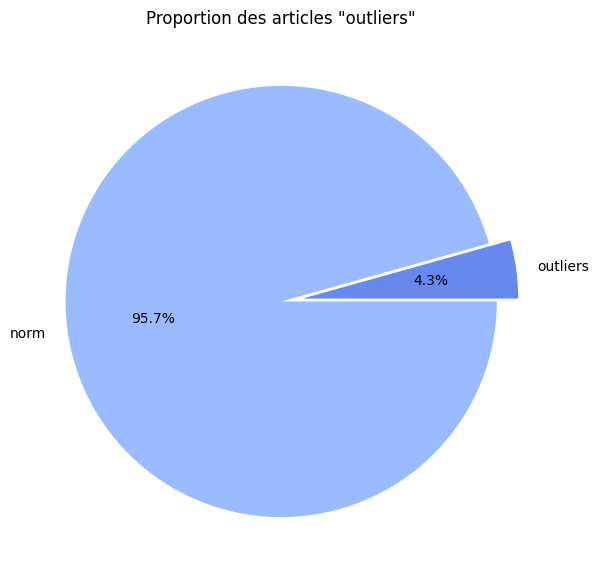

La méthode interquartile permet d'isoler 31 produits, soit 4.3%


In [2201]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outlier = df_merge[df_merge["price"] > top].shape[0]
norm = df_merge[df_merge["price"] <= top].shape[0]
catalogue = [outlier, norm]
plt.figure(figsize=(7, 7))
plt.pie(catalogue, labels=['outliers', 'norm'], autopct='%1.1f%%', explode=(0.1, 0), colors=sns.color_palette('coolwarm'))
plt.title('Proportion des articles "outliers"')
plt.show()
outliers = df_merge[df_merge["price"] > top]
print("La méthode interquartile permet d'isoler {} produits, soit 4.3%".format(outliers.shape[0]))

In [2202]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
outliers = outliers.sort_values(by= 'price', ascending=False)
outliers.head()

# Après consultation des tarifs appliqués en ligne pour ces produits, leurs prix sont justifiés.

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_title,product_type,post_mime_type,post_date,_merge,z_score
567,4352,1,225.0,0,outofstock,137.81,15940,11.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Champagne,image/jpeg,2018-03-02 10:30:04,both,6.981591
204,5001,1,217.5,18,instock,116.87,14581,2.0,David Duband Charmes-Chambertin Grand Cru 2014,Vin,image/jpeg,2018-07-17 09:45:39,both,6.709816
269,5892,1,191.3,98,instock,116.06,14983,6.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Champagne,image/jpeg,2019-03-28 10:21:36,both,5.760415
24,4402,1,176.0,11,instock,78.25,3510,3.0,Cognac Frapin VIP XO,Cognac,image/jpeg,2018-03-22 11:21:05,both,5.205993
313,5767,1,175.0,12,instock,90.42,15185,4.0,Camille Giroud Clos de Vougeot 2016,Vin,image/jpeg,2019-03-13 14:43:22,both,5.169756


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [2203]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA_article'] = df_merge['total_sales'] * df_merge['price']
#Calculez la somme de la colonne "ca_par_article"
CA_total = df_merge['CA_article'].sum()
#Ce résultat correspond au chiffre d'affaire du site web
CA_total

153748.1

In [2204]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge = df_merge.sort_values(by='CA_article', ascending = False)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(inplace = True)
#Afficher les 20 premier articles en CA
top_20 = df_merge.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(top_20, y='post_title', x='CA_article', labels = {'post_title':"Nom de l'article", 'CA_article':"Chiffre d'affaire de l'article", 'product_type':'Type de produit'}, text_auto= True)
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

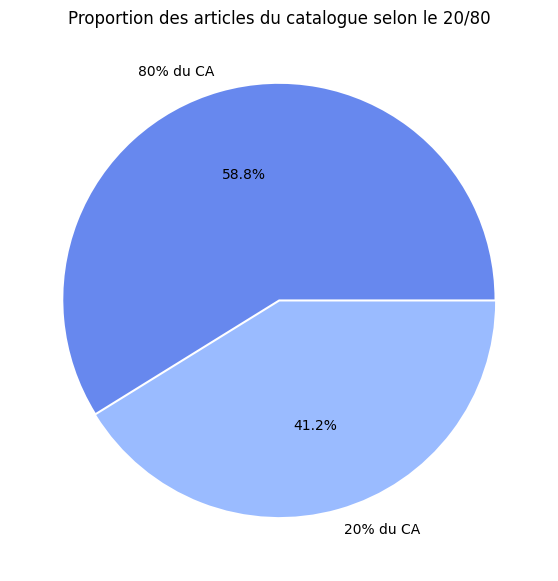

In [2205]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['CA_proportion'] = df_merge['CA_article']/CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['CA_CUMSUM'] = df_merge['CA_proportion'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
CA_80 = df_merge[df_merge['CA_CUMSUM'] <= 0.8].shape[0]

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
CA_20 = df_merge[df_merge['CA_CUMSUM']>  0.8].shape[0]
CA_global_count = [CA_80, CA_20]
plt.figure(figsize=(7, 7))
plt.pie(CA_global_count, labels=['80% du CA', '20% du CA'], autopct='%1.1f%%', explode=(0.01,0),  colors=sns.color_palette('coolwarm'))
plt.title('Proportion des articles du catalogue selon le 20/80')
plt.show()



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [2206]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

df_merge = df_merge.sort_values(by='total_sales', ascending = False)

#Réinitialiser l'index du dataset par un reset_index

df_merge.reset_index(inplace = True)

#Afficher les 20 premier articles en quantité

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_merge.head(20), y='post_title', x='total_sales', 
             labels = {'post_title':"Nom de l'article", 'total_sales':"Nombre de ventes", 'product_type':'Type de produit'}, text_auto= 'True', color='total_sales')
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

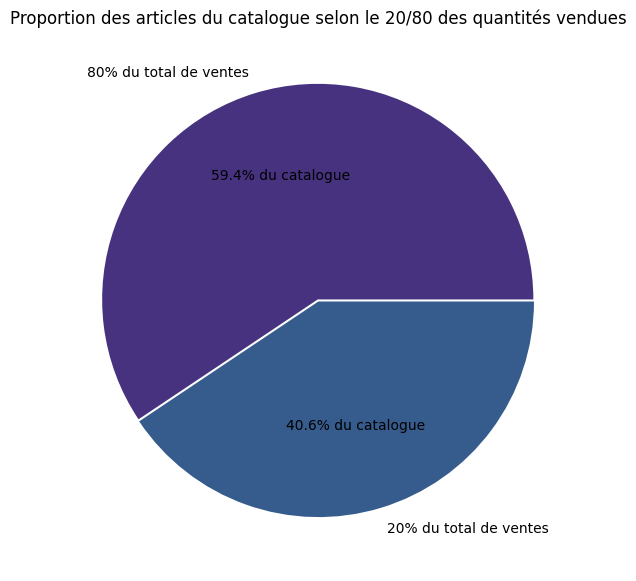

In [2207]:
#############################
# Calculer le 20 / 80 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
Qte_totale = df_merge['total_sales'].sum()
df_merge['Qte_proportion'] = df_merge['total_sales']/Qte_totale

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Qte_CUMSUM'] = df_merge['Qte_proportion'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
Qte_80 = df_merge[df_merge['Qte_CUMSUM'] <= 0.8].shape[0]
Qte_20 = df_merge[df_merge['Qte_CUMSUM']>  0.8].shape[0]
Qte_global_count = [Qte_80, Qte_20]
plt.figure(figsize=(7, 7))
def custom_autopct(pct):
    return f'{pct:.1f}% du catalogue'
plt.pie(Qte_global_count, labels=['80% du total de ventes', '20% du total de ventes'], autopct=custom_autopct, explode=(0.01,0),  colors=sns.color_palette('viridis'))
plt.title('Proportion des articles du catalogue selon le 20/80 des quantités vendues')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [2208]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 

#Création de la colonne Rotation de stock
df_merge['total_stock_quantity']= df_merge['total_sales'] + df_merge['stock_quantity']
df_merge['stock_rotation'] = df_merge['CA_article']/((df_merge['total_stock_quantity'] + df_merge['stock_quantity'])/2)

#Remplacement des "inf" par 0
df_merge['stock_rotation'] = np.where(np.isinf(df_merge['stock_rotation']), 0, df_merge['stock_rotation'])

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge [Tri selon rotation de stock ordre croissant]

df_merge = df_merge.sort_values(by='stock_rotation', ascending = True)



#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
fig = px.bar(df_merge.head(20), y='post_title', x='stock_rotation', 
             labels = {'post_title':"Nom de l'article", 'stock_rotation':"Rotation de stock", 'product_type':'Type de produit'}, text_auto= '.3s', color='stock_rotation')
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [2209]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['Stock_value']= df_merge['stock_quantity']*df_merge['purchase_price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
Total_stock_value = df_merge['Stock_value'].sum()
Total_stock_value

277328.06999999995

In [2210]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
Total_stock_qte = df_merge['stock_quantity'].sum()
Total_stock_qte

16740

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [2211]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['purchase_price_excl_tax'] = df_merge['purchase_price']*0.8

#Création de la colonne Taux de marge
df_merge['margin']= df_merge['price'] - df_merge['purchase_price_excl_tax']
df_merge['margin_rate'] = df_merge['margin']/df_merge['purchase_price_excl_tax'] 

#Afficher le prix minimum de la colonne "taux_marge"
print(df_merge.loc[df_merge['margin_rate'].idxmin()]['price'])

#Afficher le prix maximum de la colonne "taux_marge"
print(df_merge.loc[df_merge['margin_rate'].idxmax()]['price'])

12.65
62.5


In [2212]:
#affichage de la ligne avec un taux de marge inférieur à 0
negative_margin = df_merge[df_merge['margin_rate']<0]
print(negative_margin)


# On retrouve un article au prix d'achat de 77€ et au prix de vente de 12€, voir s'il s'agit d'une erreur de prix d'achat ou de vente.

negative_price = df_merge[df_merge['price']<0]
print(negative_price)

     level_0  index  product_id  onsale_web  price  stock_quantity  \
698      711     79        4355           1  12.65              97   

    stock_status  purchase_price    sku  total_sales  ... CA_proportion  \
698      instock           77.48  12589          0.0  ...           0.0   

    CA_CUMSUM Qte_proportion Qte_CUMSUM total_stock_quantity  stock_rotation  \
698       1.0            0.0        1.0                 97.0             0.0   

     Stock_value  purchase_price_excl_tax  margin  margin_rate  
698      7515.56                   61.984 -49.334    -0.795915  

[1 rows x 27 columns]
Empty DataFrame
Columns: [level_0, index, product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, sku, total_sales, post_title, product_type, post_mime_type, post_date, _merge, z_score, CA_article, CA_proportion, CA_CUMSUM, Qte_proportion, Qte_CUMSUM, total_stock_quantity, stock_rotation, Stock_value, purchase_price_excl_tax, margin, margin_rate]
Index: []

[0 rows x 27 

In [2213]:
#création d'un dataframe avec les taux positifs
positive_margin = df_merge[df_merge['margin_rate']>0]

#Afficher le prix minimum de la colonne "taux_marge"
print(positive_margin['price'].min())

#Afficher le prix maximum de la colonne "taux_marge"
print(positive_margin['price'].max())

5.2
225.0


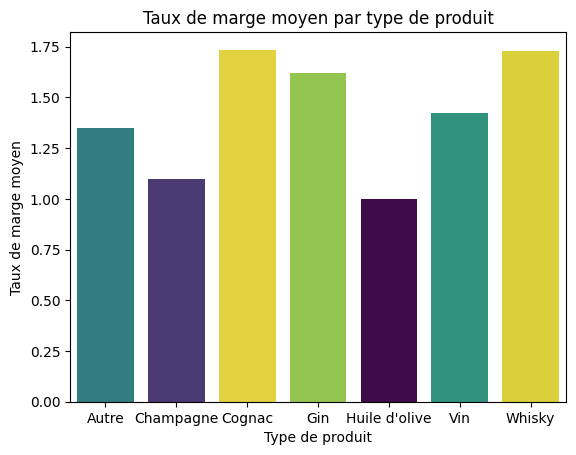

In [2214]:
#création d'un dataframe avec le taux de marge moyen par type de produit
mean_margin_rate_by_type = positive_margin.groupby('product_type')['margin_rate'].mean()
mean_margin_rate_by_type = mean_margin_rate_by_type.reset_index()

#Affichage dans un graphique du taux de marge par type de produit
sns.barplot(data=mean_margin_rate_by_type,x ='product_type', y='margin_rate', hue='margin_rate', palette='viridis', legend=None)
plt.title('Taux de marge moyen par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Taux de marge moyen')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

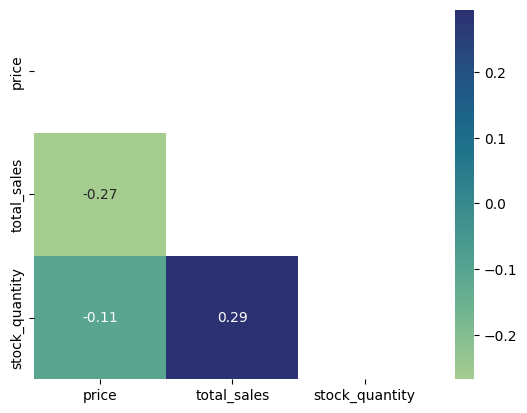

In [2215]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap
df_merge_ssp = df_merge[['price', 'total_sales', 'stock_quantity']]
corr_matrix = df_merge_ssp.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='crest')
plt.show()

In [2216]:
#Que peut-on conclure des correlations ?
# Faibles correlations entre ces valeurs: le prix aurait une faible tendance à faire diminuer les ventes, et on aurait tendance à avoir un ré approvisionnement logiquement 
# plus important en fonction des ventes. Les  valeurs de corrélations sont tout de même faibles, on peut difficlement dire avec certitude que le prix aurait un impact sur le stock et
# les ventes d'un produit, il faudrait chercher quels autres facteurs pourraient influencer la quantité de vente de certains produits (millésime, type de produit ?)

mean_rotation_by_type = df_merge.groupby('product_type')['stock_rotation'].mean()
print(mean_rotation_by_type)
mean_stock_value_by_type = df_merge.groupby('product_type')['Stock_value'].mean()
print(mean_stock_value_by_type)


product_type
Autre             6.603774
Champagne        20.699589
Cognac           27.508515
Gin              27.000000
Huile d'olive     7.727457
Vin              13.544640
Whisky           29.227608
Name: stock_rotation, dtype: float64
product_type
Autre             305.900000
Champagne        4344.285000
Cognac            557.730000
Gin                94.380000
Huile d'olive     647.906667
Vin               221.915669
Whisky            197.668571
Name: Stock_value, dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [2217]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel('merged_data.xlsx', index=False)